# Logistic Regression From Scratch

In [1]:
# IMPORTS
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [4]:
# DATA 
n = 200
X, Y = make_blobs(n_samples = n, centers = 2, n_features = 2, cluster_std = 5, random_state = 11) # 11 random normal

dim_add = np.array([1]*n)[np.newaxis]
X = np.append(X.T, dim_add, axis=0)
X = X.T

In [5]:
# MY FROM SCRATCH IMPLIMENTATION

def sigmoid(z): #Non-Linear Hypothesis Function
    return 1.0 / (1.0 + np.exp(-z))


def gradient_descent(w,  X, Y, eta, d, t, lamb):
    for i in range(t):
        hypothesis = sigmoid(np.dot(w.T, X))
#        hypothesis[hypothesis > 0.5] = 1
#        hypothesis[hypothesis <= 0.5] = 0

        gradient_weight = np.array(np.dot(hypothesis - Y, X.T)) / len(X[0])
        regularization = lamb * np.linalg.norm(w) 

        w = (w.T - eta * (gradient_weight + regularization)).T

    return w

In [6]:
# SKLEARN Implimentation for Reference

logisticReg = LogisticRegression()
logisticReg.fit(X, Y)
test = logisticReg.predict(X)
coef = logisticReg.coef_[0]

In [7]:
init_weights = np.array([[0], [0], [0]])
eta = 0.01
dimension = len(init_weights)
t = 10000
lamb = 0.0001

weights = gradient_descent(init_weights, X.T, Y, eta, dimension, t, lamb)

print("Scratch Implimentation Weights: {}".format(weights.T))


# ------ #

print("SKLearn Implimentation Weights: {}".format(coef))

weight_0 = coef[0]
weight_1 = coef[1]
weight_2 = coef[2]

Scratch Implimentation Weights: [[0.20449752 0.58926337 2.17462173]]
SKLearn Implimentation Weights: [2.23282403e-01 6.13778726e-01 3.82069052e-07]


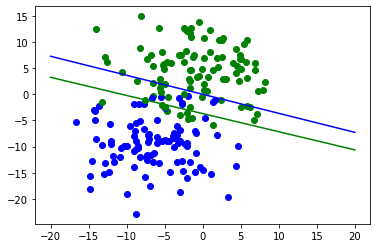

In [8]:
# PLOTTING

X = X.T
for i in range(n):
    if (Y[i] == 1):
        plt.scatter(X[:, i][0], X[:, i][1], color="green") 
    else:
        plt.scatter(X[:, i][0], X[:, i][1], color="blue")

        
x = np.linspace(-20, 20, 20)
hyperplane_1 = (((-1)*(weights[0] / weights[1]) * x) - (weights[2]/weights[1]))
hyperplane = (((-1)*(weight_0 / weight_1) * x) - (weight_2/weight_1))

plt.plot(x, hyperplane, '-', color="blue")
plt.plot(x, hyperplane_1, '-', color="green")

plt.show()